In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx
import networkx as nx

In [ ]:
gdf = gpd.read_file("data/swiss-boundaries.gkpg")
# do we really need that?
gdf["geometry"] = gdf["geometry"].simplify(0.5) 

gdf = gdf.to_crs(epsg=3857)

In [5]:
cx.providers.SwissFederalGeoportal 

{'NationalMapColor': {'url': 'https://wmts.geo.admin.ch/1.0.0/ch.swisstopo.pixelkarte-farbe/default/current/3857/{z}/{x}/{y}.jpeg',
  'html_attribution': '<a target="_blank" href="https://www.swisstopo.admin.ch/">swisstopo</a>',
  'attribution': '© swisstopo',
  'bounds': [[45.398181, 5.140242], [48.230651, 11.47757]],
  'min_zoom': 2,
  'max_zoom': 18,
  'name': 'SwissFederalGeoportal.NationalMapColor'},
 'NationalMapGrey': {'url': 'https://wmts.geo.admin.ch/1.0.0/ch.swisstopo.pixelkarte-grau/default/current/3857/{z}/{x}/{y}.jpeg',
  'html_attribution': '<a target="_blank" href="https://www.swisstopo.admin.ch/">swisstopo</a>',
  'attribution': '© swisstopo',
  'bounds': [[45.398181, 5.140242], [48.230651, 11.47757]],
  'min_zoom': 2,
  'max_zoom': 18,
  'name': 'SwissFederalGeoportal.NationalMapGrey'},
 'SWISSIMAGE': {'url': 'https://wmts.geo.admin.ch/1.0.0/ch.swisstopo.swissimage/default/current/3857/{z}/{x}/{y}.jpeg',
  'html_attribution': '<a target="_blank" href="https://www.swisstopo.admin.ch/">swisstopo</a>',
  'attribution': '© swisstopo',
  'bounds': [[45.398181, 5.140242], [48.230651, 11.47757]],
  'min_zoom': 2,
  'max_zoom': 19,
  'name': 'SwissFederalGeoportal.SWISSIMAGE'},
 'JourneyThroughTime': {'url': 'https://wmts.geo.admin.ch/1.0.0/ch.swisstopo.zeitreihen/default/{time}/3857/{z}/{x}/{y}.png',
  'html_attribution': '<a target="_blank" href="https://www.swisstopo.admin.ch/">swisstopo</a>',
  'attribution': '© swisstopo',
  'bounds': [[45.398181, 5.140242], [48.230651, 11.47757]],
  'min_zoom': 2,
  'max_zoom': 18,
  'time': 18641231,
  'name': 'SwissFederalGeoportal.JourneyThroughTime'}}

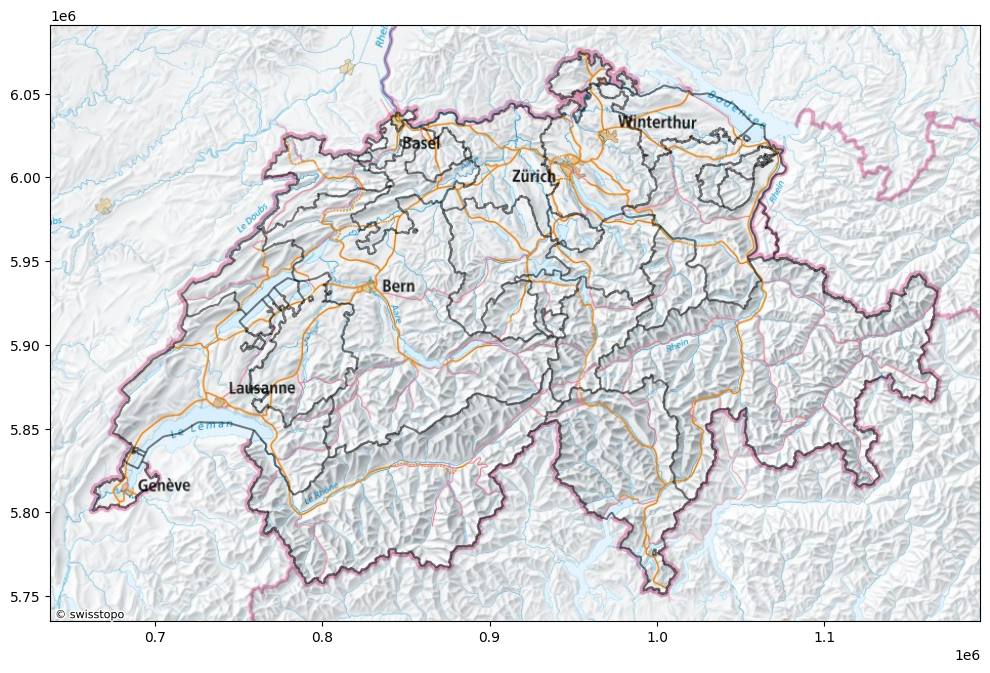

In [10]:
# select kanton lines
#plt.figsize(10, 12)
ax = gdf[gdf["typ"] != "k_W"].plot(figsize=(12, 12), alpha=0.5, edgecolor="k")
cx.add_basemap(ax, source=cx.providers.SwissFederalGeoportal.NationalMapColor)

In [7]:
df = gpd.read_file('data/stations.geojson')
df['lon'] = df['geometry'].x
df['lat'] = df['geometry'].y

df

,station_name,geometry,lon,lat
0,Aadorf,POINT (8.90356 47.48793),8.903562,47.487933
1,Aalen,POINT (10.09627 48.84102),10.096273,48.841016
2,Aarau,POINT (8.05418 47.39186),8.054178,47.391855
3,Aarau Torfeld,POINT (8.06264 47.39356),8.062640,47.393564
4,Aarberg,POINT (7.27807 47.04368),7.278070,47.043676
...,...,...,...,...
3468,Öhningen (See),POINT (8.89457 47.65210),8.894570,47.652096
3469,Überlingen,POINT (9.16285 47.76910),9.162852,47.769101
3470,Überlingen Hafen,POINT (9.16076 47.76581),9.160759,47.765810
3471,Überlingen Therme,POINT (9.14564 47.76927),9.145640,47.769270


In [11]:
ax.scatter(df['lon'], df['lat'])